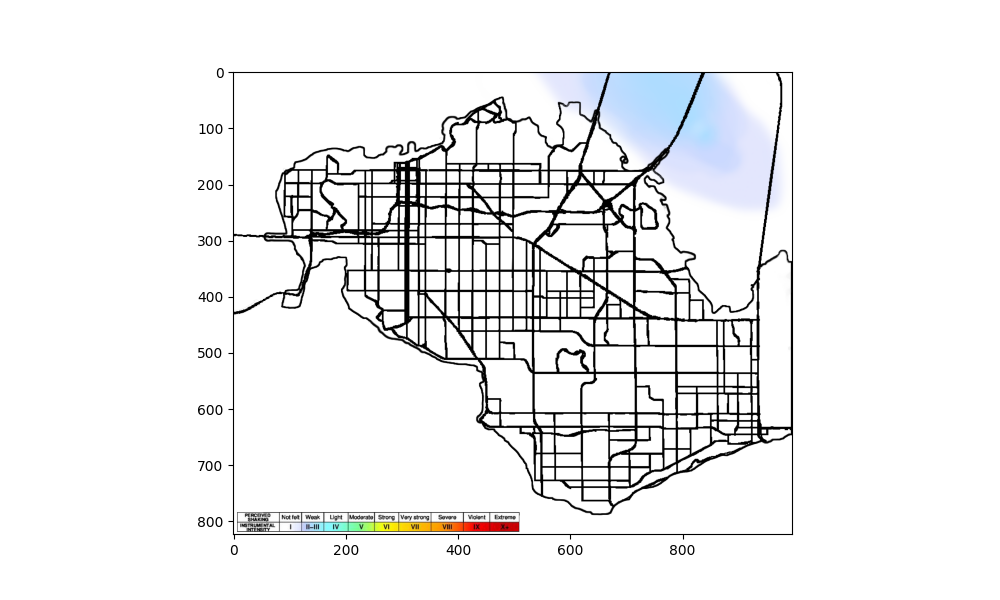

In [162]:
%matplotlib ipympl
import pandas as pd
df=pd.read_csv("reports-data.csv")
import matplotlib
#print(matplotlib.get_backend())

import matplotlib.pyplot as plt
# show pre-shake map
def map1():
    preShake = plt.imread("prequake-shakemap.png")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    ax.imshow(preShake)
map1()

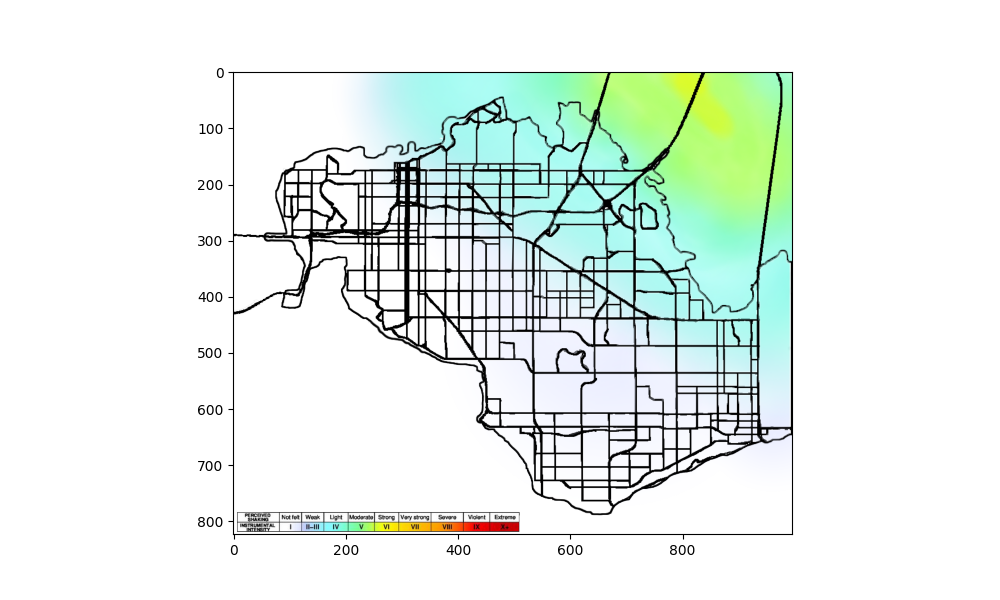

In [163]:
# show main shake map
def map2():
    shake = plt.imread("majorquake-shakemap.png")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    ax.imshow(shake)
map2()

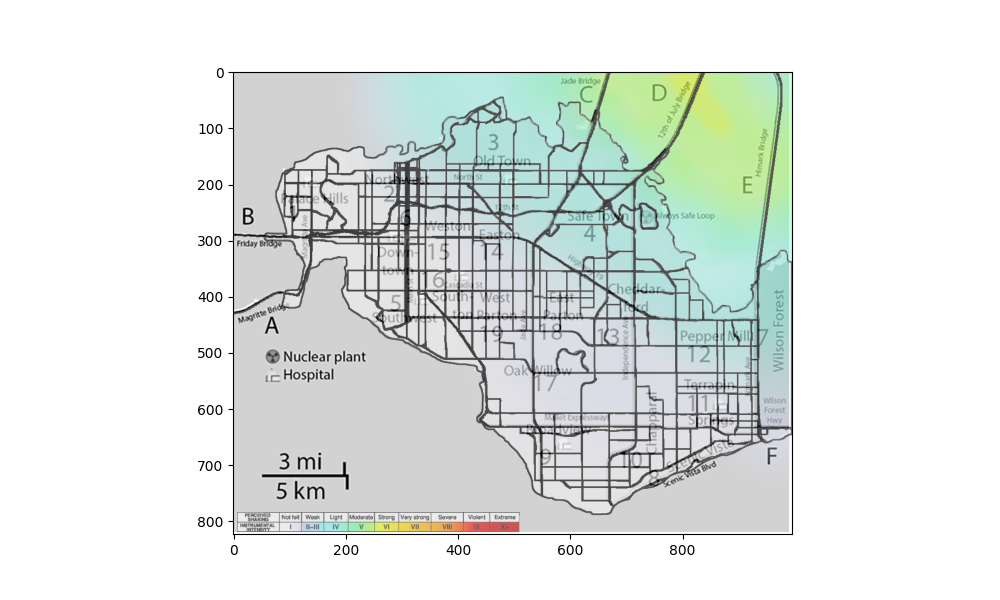

In [164]:
# overlay of major shake map on neighborhood map
def map3():
    neighborhood = plt.imread("neighborhoodGray.png")
    shake = plt.imread("majorquake-shakemap.png")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    im1 = ax.imshow(neighborhood)
    im2 = ax.imshow(shake, alpha=.6)
    plt.show()
map3()

In [165]:
from PIL import Image
# make clearer version of shake maps
def convertImage(path):
    img = Image.open(path)
    img = img.convert("RGBA")

    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save("./"+str(path[0:-4])+"New.png", "PNG")
    print("Successful")

convertImage("majorquake-shakemap.png")

Successful


In [166]:
convertImage("prequake-shakemap.png")

Successful


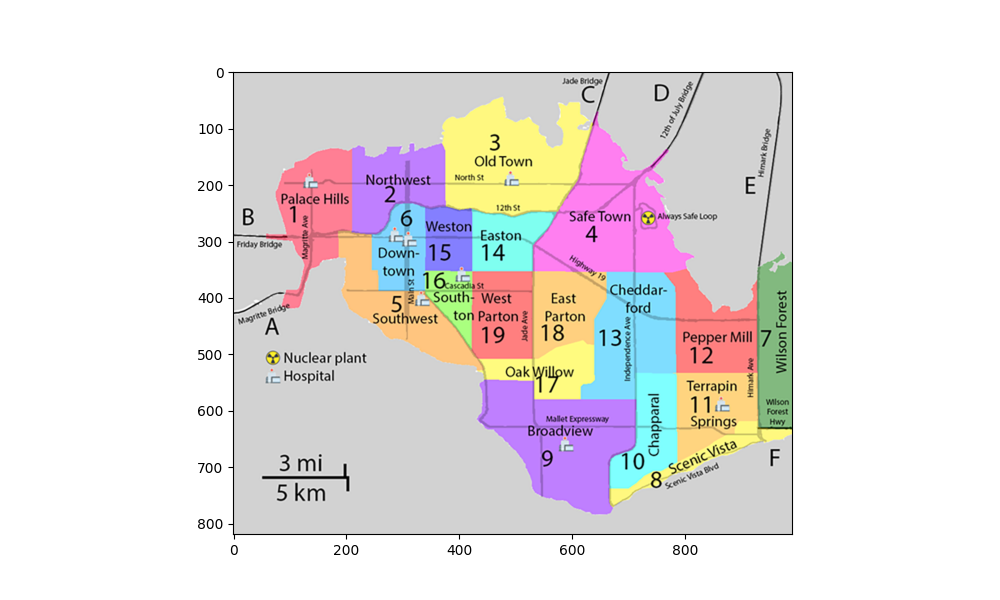

In [167]:
# show neighborhood map from project description
def neighMap():
    neighborhoodColor = plt.imread("neighborhood.png")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    ax.imshow(neighborhoodColor)
neighMap()

In [168]:
# Tabulate info about the neighborhoods and city from the various documents and problem statements provided
def neighDataOnHand():
    neighborhoodNumbers = [i for i in range(1,20)]
    #print(neighborhoodNumbers)
    neighborhoodNames = ["Palace Hills", "Northwest", "Old Town", "Safe Town", "Southwest", "Downtown", "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Terrapin Springs", "Pepper Mill", "Cheddarford", "Easton", "Weston", "Southton", "Oak Willow", "East Parton", "West Parton"]
    hasHospital = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
    hasOutsideAccess = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    hasSewerWork = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
    hasRoadWork = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    roadworkNeigh = [7, 8, 9, 8, 16, 6, 10, 13, 1, 3, 4]
    indicesRoadwork = [i-1 for i in roadworkNeigh]
    for i in indicesRoadwork:
        hasRoadWork[i] = 1
    hasPowerWork = [0 for i in range(1, 20)]
    hasPowerWork[2], hasPowerWork[4] = 1, 1
    neighOut = [7, 12, 8, 1, 4, 3]
    indicesOut = [i-1 for i in neighOut]
    for i in indicesOut:
        hasOutsideAccess[i] = 1
    # pixel coords for each neighborhood
    coords = [(150, 200), (300, 200), (500, 150), (650, 300), (300, 450), (300, 300), (950, 500), (800, 700), (600, 700), (750, 650), (850, 600), (850, 450), (700, 450), (475, 300), (390, 300), (390, 390), (575, 525), (600, 450), (475, 450)]
    maxMeasuredShakeStr = ['1', '3', '5', '5', '1', '2', '5', '2', '2', '2', '3', '4', '4', '3', '2', '2', '2', '3', '2']
    maxMeasuredShake = [float(i) for i in maxMeasuredShakeStr]
    data1 = [neighborhoodNumbers, neighborhoodNames,  hasHospital, hasOutsideAccess, hasSewerWork, hasRoadWork, hasPowerWork, coords, maxMeasuredShake]
    xCoords = [i[0] for i in coords]
    yCoords = [i[1] for i in coords]

    neighDict = {"location": neighborhoodNumbers, "Name": neighborhoodNames , "hasHospital": hasHospital, "hasOutsideAccess": hasOutsideAccess , "hasSewerWork": hasSewerWork, "hasRoadWork": hasRoadWork, "hasPowerWork": hasPowerWork, "maxMeasuredShake": maxMeasuredShake, "xCoords": xCoords, "yCoords": yCoords}
    neighFuncDF = pd.DataFrame(neighDict)
    return neighFuncDF
neighDF = neighDataOnHand()

In [169]:
df["time"] = pd.to_datetime(df["time"])

In [170]:
# Organizing dataframes into formats most useful for visualization
# Sorting by time and location and grouping into hours
sortedDF = df.sort_values(by = ['time', 'location'])
sortedDF2 = df.sort_values(by = ['location', 'time'])
sortedDF3 = sortedDF.copy()
sortedDF3['time'] = sortedDF3['time'].dt.round("H")

# numbering each hour
dateMin = sortedDF['time'].min()
dateMax = sortedDF['time'].max()
listDates = pd.date_range(dateMin, dateMax, freq="H")
print(listDates)
print(len(listDates))
dateNums = [i for i in range(len(listDates))]
print(len(dateNums))
datesDict = {'time': listDates, 'hourNumber': dateNums}
datesFrame = pd.DataFrame(datesDict)

# Groups all data together for convenience, adding hours and a location copy
numberedHoursFull = sortedDF3.merge(datesFrame, how = 'left', on ='time')
column_to_move = numberedHoursFull.pop("hourNumber")
numberedHoursFull.insert(1, "hourNumber", column_to_move)
df3Joined = numberedHoursFull.merge(neighDF, on = 'location', how='left')
df3Joined['locationCopy'] = df3Joined['location']

# various aggregations, j for joined from df3Joined
jmeanBins = df3Joined.groupby(by = ["time", "location"]).mean(numeric_only=True)
jminBins = df3Joined.groupby(by = ["time", "location"]).min()
jmaxBins = df3Joined.groupby(by = ["time", "location"]).max()
jmedianBins = df3Joined.groupby(by = ["time", "location"]).median(numeric_only=True)
jCountBins = df3Joined.groupby(by = ["time", "location"]).count()

# needed the DF view formatted different when showing it
sortedDF2 = sortedDF2.merge(neighDF, on = 'location', how='left')
column_to_move_2 = sortedDF2.pop("location")
sortedDF2.insert(0, "location", column_to_move_2)

# Counting how many reports there are
jCountBins2 = jCountBins[['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity']]
jCountBins3 = jCountBins2.to_records()
jCountBins4 = pd.DataFrame.from_records(jCountBins3)
jCountBins5 = jCountBins4.merge(datesFrame, how = 'left', on ='time')
jCountBins5['locationCopy'] = jCountBins5['location']
jCountBins5


# Counting and organizing the NaNs in the shake intensity column
nansDF = df3Joined[df3Joined['shake_intensity'].isna()]
nansDF2 = nansDF[['hourNumber', 'shake_intensity', 'locationCopy']]
nansDF2 = nansDF2.fillna(-1)
nansDF3 = nansDF2.groupby(by = ["hourNumber", "locationCopy"]).count()
nansDF4 = nansDF3.to_records()
nansDF5 = pd.DataFrame.from_records(nansDF4)

DatetimeIndex(['2020-04-06 00:00:00', '2020-04-06 01:00:00',
               '2020-04-06 02:00:00', '2020-04-06 03:00:00',
               '2020-04-06 04:00:00', '2020-04-06 05:00:00',
               '2020-04-06 06:00:00', '2020-04-06 07:00:00',
               '2020-04-06 08:00:00', '2020-04-06 09:00:00',
               ...
               '2020-04-10 15:00:00', '2020-04-10 16:00:00',
               '2020-04-10 17:00:00', '2020-04-10 18:00:00',
               '2020-04-10 19:00:00', '2020-04-10 20:00:00',
               '2020-04-10 21:00:00', '2020-04-10 22:00:00',
               '2020-04-10 23:00:00', '2020-04-11 00:00:00'],
              dtype='datetime64[ns]', length=121, freq='H')
121
121


In [171]:
sortedDF2

location                time  sewer_and_water  power  \
0             1 2020-04-06 00:35:00              2.0   10.0   
1             1 2020-04-06 01:20:00             10.0    7.0   
2             1 2020-04-06 01:25:00              5.0    0.0   
3             1 2020-04-06 01:35:00              9.0   10.0   
4             1 2020-04-06 02:00:00              6.0    1.0   
...         ...                 ...              ...    ...   
83065        19 2020-04-10 22:20:00              7.0    6.0   
83066        19 2020-04-10 22:35:00             10.0   10.0   
83067        19 2020-04-10 23:05:00              3.0    4.0   
83068        19 2020-04-10 23:15:00              1.0    2.0   
83069        19 2020-04-10 23:25:00              6.0    4.0   

       roads_and_bridges  medical  buildings  shake_intensity          Name  \
0                    3.0      5.0        5.0              NaN  Palace Hills   
1                    6.0      7.0        3.0              NaN  Palace Hills   
2                    6.0      3.0        6.0              1.0  Palace Hills   
3                    2.0      4.0        0.0              NaN  Palace Hills   
4                    0.0     10.0       10.0              NaN  Palace Hills   
...                  ...      ...        ...              ...           ...   
83065                0.0      NaN       10.0              NaN   West Parton   
83066                8.0      NaN        5.0              NaN   West Parton   
83067                8.0      NaN        2.0              NaN   West Parton   
83068                8.0      NaN       10.0              NaN   West Parton   
83069                9.0      NaN        1.0              1.0   West Parton   

       hasHospital  hasOutsideAccess  hasSewerWork  hasRoadWork  hasPowerWork  \
0                1                 1             0            1             0   
1                1                 1             0            1             0   
2                1                 1             0            1             0   
3                1                 1             0            1             0   
4                1                 1             0            1             0   
...            ...               ...           ...          ...           ...   
83065            0                 0             1            0             0   
83066            0                 0             1            0             0   
83067            0                 0             1            0             0   
83068            0                 0             1            0             0   
83069            0                 0             1            0             0   

       maxMeasuredShake  xCoords  yCoords  
0                   1.0      150      200  
1                   1.0      150      200  
2                   1.0      150      200  
3                   1.0      150      200  
4                   1.0      150      200  
...                 ...      ...      ...  
83065               2.0      475      450  
83066               2.0      475      450  
83067               2.0      475      450  
83068               2.0      475      450  
83069               2.0      475      450  

[83070 rows x 17 columns]

In [172]:
# pulls all the text and black lines from the neighborhood map that I converted to grayscale in an image editor
def convertImage2(path):
    img = Image.open(path)
    img = img.convert("RGBA")

    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] >= 120 and item[1] >= 120 and item[2] >= 120:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save("./"+str(path[0:-4])+"New2.png", "PNG")
    print("Successful")

convertImage2("neighborhoodGray.png")

Successful


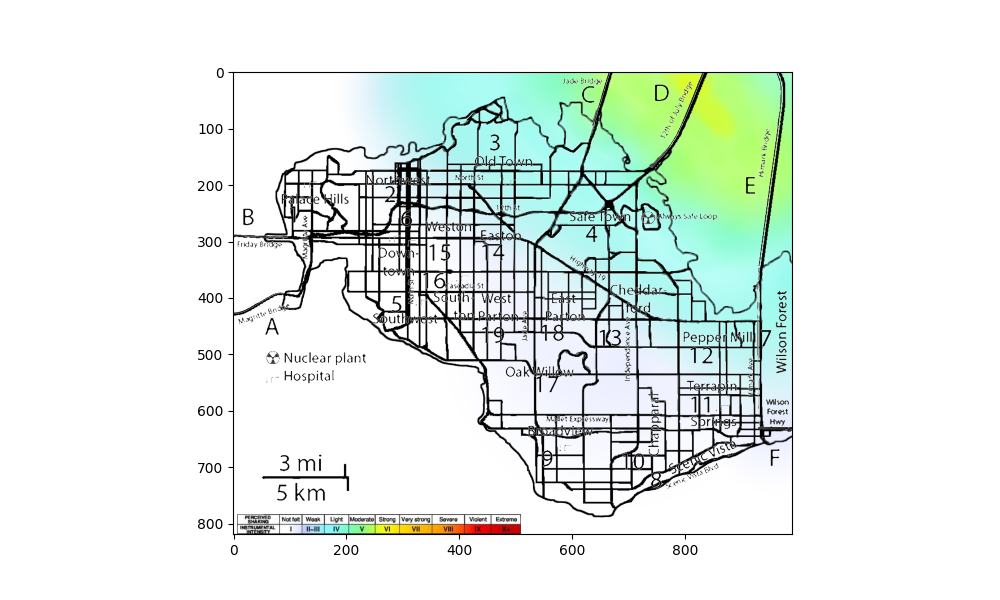

In [173]:
# Shows major quake map over the neighborhood labels
def quakeRoadMap():
    neighborhood2 = plt.imread("neighborhoodGrayNew2.png")
    shake = plt.imread("majorquake-shakemap.png")
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    im1 = ax.imshow(shake)
    im2 = ax.imshow(neighborhood2)
    plt.show()

quakeRoadMap()

In [174]:
damageReports = ['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity']

In [175]:
df3Joined

time  hourNumber  sewer_and_water  power  roads_and_bridges  \
0     2020-04-06           0              2.0    8.0                5.0   
1     2020-04-06           0              6.0    3.0               10.0   
2     2020-04-06           0             10.0    2.0                9.0   
3     2020-04-06           0              8.0    1.0               10.0   
4     2020-04-06           0              9.0    7.0                5.0   
...          ...         ...              ...    ...                ...   
83065 2020-04-11         120              5.0    2.0                2.0   
83066 2020-04-11         120              7.0    7.0                8.0   
83067 2020-04-11         120              4.0    9.0                7.0   
83068 2020-04-11         120              5.0    1.0                3.0   
83069 2020-04-11         120              5.0    9.0                6.0   

       medical  buildings  shake_intensity  location          Name  \
0          NaN        3.0              0.0         2     Northwest   
1         10.0        9.0              NaN         3      Old Town   
2          NaN       10.0              NaN         4     Safe Town   
3          NaN        3.0              1.0         4     Safe Town   
4          NaN        4.0              NaN         8  Scenic Vista   
...        ...        ...              ...       ...           ...   
83065      NaN        8.0              NaN         2     Northwest   
83066     10.0       10.0              NaN         6      Downtown   
83067      NaN        7.0              NaN        13   Cheddarford   
83068      NaN        2.0              NaN        15        Weston   
83069      NaN        2.0              0.0        18   East Parton   

       hasHospital  hasOutsideAccess  hasSewerWork  hasRoadWork  hasPowerWork  \
0                0                 0             0            0             0   
1                1                 1             1            1             1   
2                0                 1             0            1             0   
3                0                 1             0            1             0   
4                0                 1             0            1             0   
...            ...               ...           ...          ...           ...   
83065            0                 0             0            0             0   
83066            1                 0             0            1             0   
83067            0                 0             0            1             0   
83068            0                 0             0            0             0   
83069            0                 0             1            0             0   

       maxMeasuredShake  xCoords  yCoords  locationCopy  
0                   3.0      300      200             2  
1                   5.0      500      150             3  
2                   5.0      650      300             4  
3                   5.0      650      300             4  
4                   2.0      800      700             8  
...                 ...      ...      ...           ...  
83065               3.0      300      200             2  
83066               2.0      300      300             6  
83067               4.0      700      450            13  
83068               2.0      390      300            15  
83069               3.0      600      450            18  

[83070 rows x 19 columns]

In [176]:
sortedDF2
df2MedianBins = sortedDF2.groupby(by = ["time", "location"]).median(numeric_only=True)

In [177]:
df2MedianBins.dtypes

sewer_and_water      float64
power                float64
roads_and_bridges    float64
medical              float64
buildings            float64
shake_intensity      float64
hasHospital          float64
hasOutsideAccess     float64
hasSewerWork         float64
hasRoadWork          float64
hasPowerWork         float64
maxMeasuredShake     float64
xCoords              float64
yCoords              float64
dtype: object

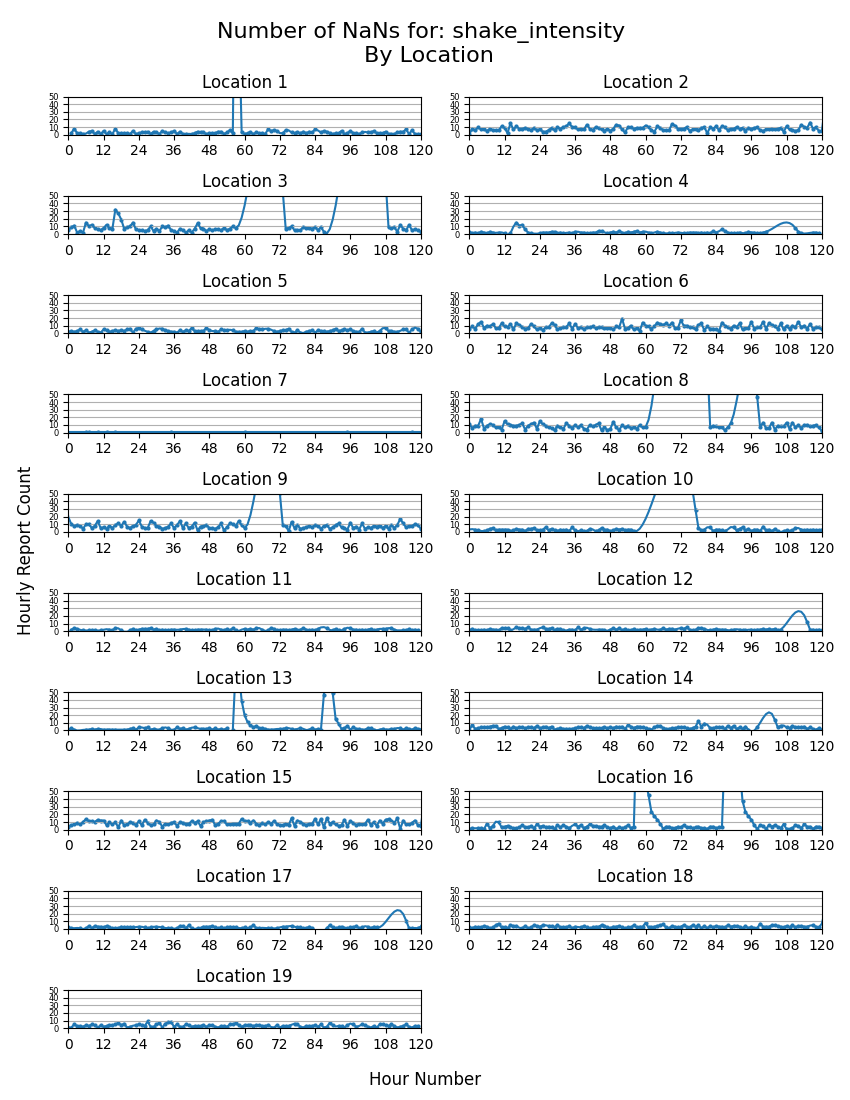

In [178]:
# plots the shake intensity NaNs by hour and location
def plot_grid_nans(df, column_name):
    plt.close()
    colStr = str(column_name)
    across = 2
    down = 10
    fig, ax = plt.subplots(down, across)
    count = 1
    for i in range(down):
        for j in range(across):
            if count < 20:
                subframe = df[df['locationCopy']==count]
                x = [i for i in subframe['hourNumber']]
                y = [i for i in subframe[colStr]]
                xyDict = {'x': x, 'y': y}
                xyFrame = pd.DataFrame(xyDict)
                xyFrame = xyFrame.fillna(-100)
                try:
                    spline = CubicSpline(xyFrame['x'], xyFrame['y'])
                except:
                    spline = lambda x: 0*x
                xSpline = np.arange(-1, 122, 1)
                ax[i, j].scatter(x, y, s = 4)
                ax[i, j].plot(xSpline, spline(xSpline))
                ax[i, j].set_xlim(left=0, right=120)
                ax[i, j].set_ylim(bottom=0, top=50)
                ax[i, j].set_yticks(np.arange(0,60,10))
                ax[i, j].set_xticks(np.arange(0,132,12))
                ax[i,j].tick_params(axis = 'y', labelsize = 6)
                ax[i, j].grid(axis = 'y')
                ax[i, j].set_title(f'Location {count}')
                count+=1
            else:
                ax[i,j].set_visible(False)
    fig.suptitle(f'Number of NaNs for: {column_name} \n By Location', fontsize=16)
    fig.supylabel('Hourly Report Count')
    fig.supxlabel('Hour Number')
    fig.set_size_inches(8.5, 11)
    fig.tight_layout()
    plt.savefig(f'{column_name}_nan_counts.png')
    #fig.show()
plot_grid_nans(nansDF5, 'shake_intensity')

In [179]:
# Plots median damage report each hour for each damage type and location
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np
damageReports = ['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity']
def plot_grid(df, column_name):
    plt.close()
    colStr = str(column_name)
    across = 2
    down = 10
    fig, ax = plt.subplots(down, across)
    count = 1
    for i in range(down):
        for j in range(across):
            if count < 20:
                subframe = df[df['locationCopy']==count]
                x = [i for i in subframe['hourNumber']]
                y = [i for i in subframe[colStr]]
                xyDict = {'x': x, 'y': y}
                xyFrame = pd.DataFrame(xyDict)
                xyFrame = xyFrame.fillna(-100)
                try:
                    spline = CubicSpline(xyFrame['x'], xyFrame['y'])
                except:
                    spline = lambda x: 0*x
                xSpline = np.arange(-1, 122, 1)
                ax[i, j].scatter(x, y, s = 4)
                ax[i, j].plot(xSpline, spline(xSpline))
                ax[i, j].set_xlim(left=0, right=120)
                ax[i, j].set_ylim(bottom=0, top=10)
                ax[i, j].set_yticks(np.arange(0,12,2))
                ax[i, j].set_xticks(np.arange(0,132,12))
                ax[i,j].tick_params(axis = 'y', labelsize = 6)
                ax[i, j].grid(axis = 'y')
                ax[i, j].set_title(f'Location {count}')
                count+=1
            else:
                ax[i,j].set_visible(False)
    fig.suptitle(f'Data Column: {column_name} \n By Location', fontsize=16)
    fig.supylabel('Severity on a scale of 0-10')
    fig.supxlabel('Hour Number')
    fig.set_size_inches(8.5, 11)
    fig.tight_layout()
    plt.savefig(f'{column_name}_severity.png')
    #fig.show()



In [180]:
# Plots damage report counts each hour for each damage type and location
def plot_grid_counts(df, column_name):
    plt.close()
    colStr = str(column_name)
    across = 2
    down = 10
    fig, ax = plt.subplots(down, across)
    count = 1
    for i in range(down):
        for j in range(across):
            if count < 20:
                subframe = df[df['locationCopy']==count]
                x = [i for i in subframe['hourNumber']]
                y = [i for i in subframe[colStr]]
                xyDict = {'x': x, 'y': y}
                xyFrame = pd.DataFrame(xyDict)
                xyFrame = xyFrame.fillna(-100)
                try:
                    spline = CubicSpline(xyFrame['x'], xyFrame['y'])
                except:
                    spline = lambda x: 0*x
                xSpline = np.arange(-1, 122, 1)
                ax[i, j].scatter(x, y, s = 4)
                ax[i, j].plot(xSpline, spline(xSpline))
                ax[i, j].set_xlim(left=0, right=120)
                ax[i, j].set_ylim(bottom=0, top=5000)
                ax[i, j].set_yticks(np.arange(0,6000,1000))
                ax[i, j].set_xticks(np.arange(0,132,12))
                ax[i,j].tick_params(axis = 'y', labelsize = 6)
                ax[i, j].grid(axis = 'y')
                ax[i, j].set_title(f'Location {count}')
                count+=1
            else:
                ax[i,j].set_visible(False)
    fig.suptitle(f'Number of reports for: {column_name} \n By Location', fontsize=16)
    fig.supylabel('Hourly Report Count')
    fig.supxlabel('Hour Number')
    fig.set_size_inches(8.5, 11)
    fig.tight_layout()
    plt.savefig(f'{column_name}_counts.png')
    #fig.show()



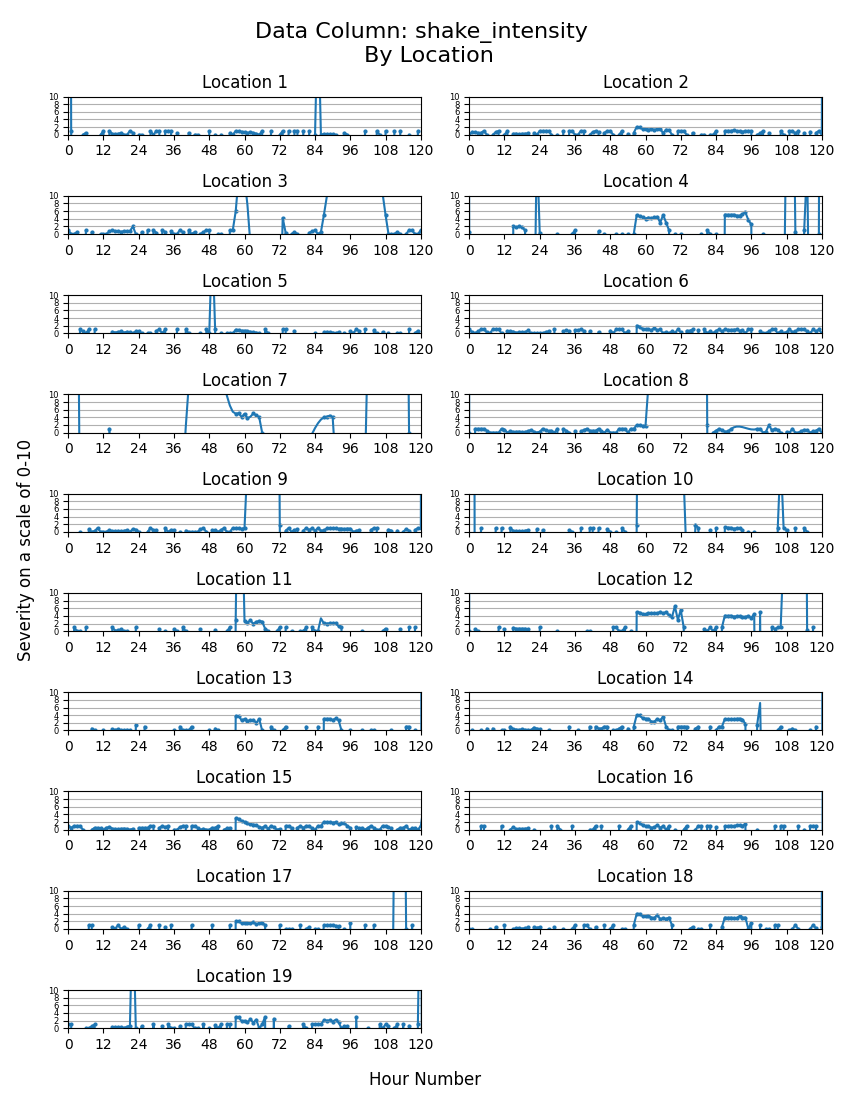

In [181]:
# Mean shake intensity to compare to median
plot_grid(jmeanBins, 'shake_intensity')

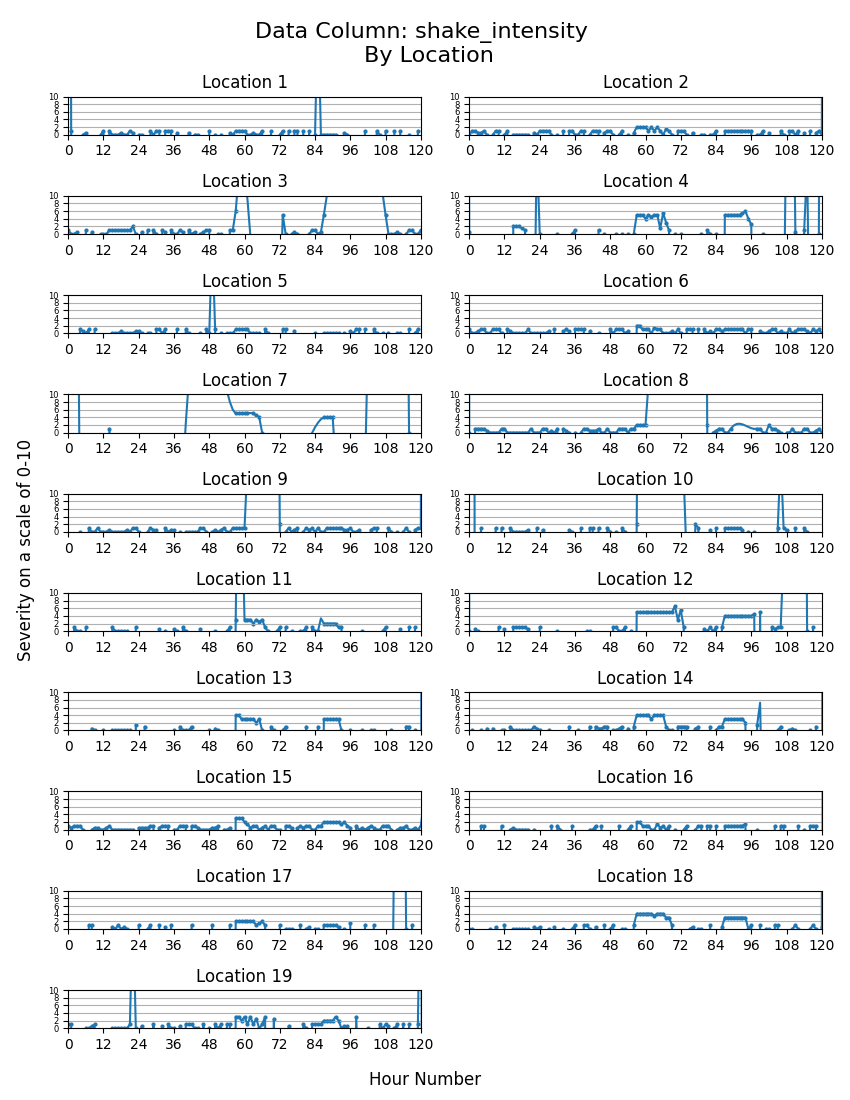

In [182]:
# median shake intensity
plot_grid(jmedianBins, 'shake_intensity')

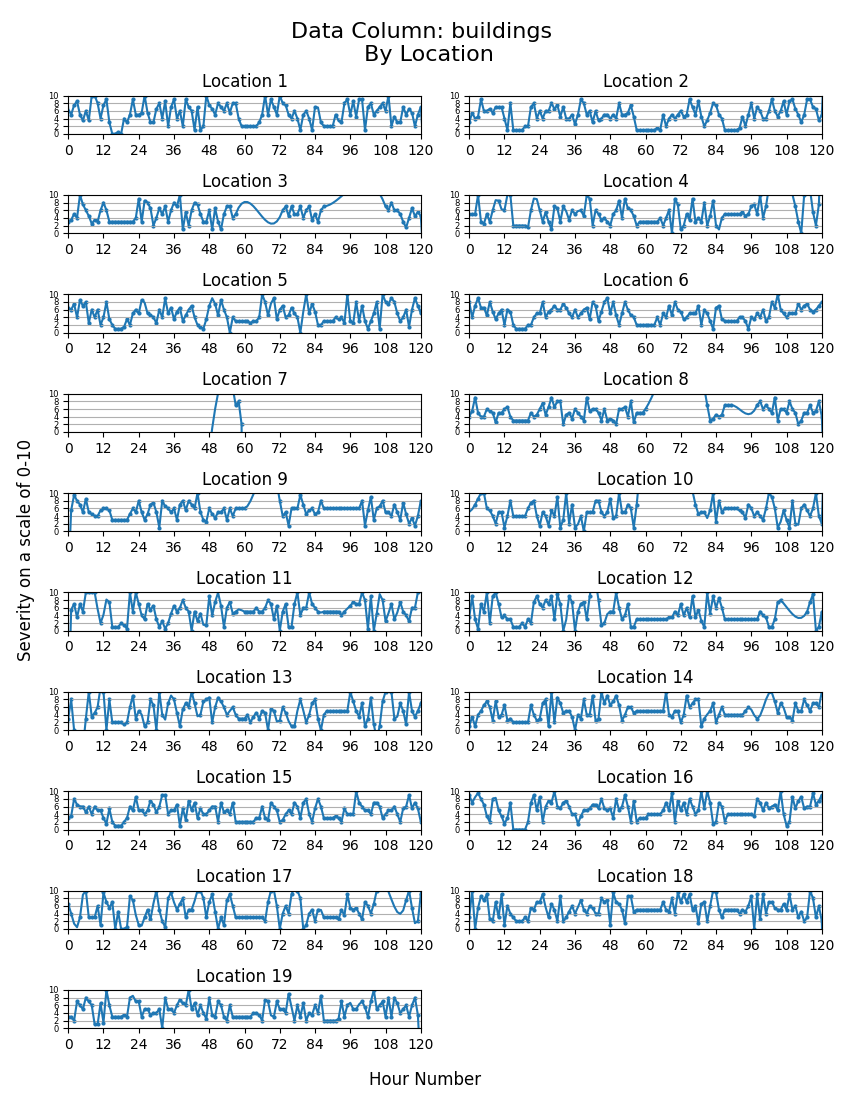

In [183]:
# The rest of the damage report plots
for i in damageReports[:-1]:
    plot_grid(jmedianBins, i)

In [184]:
# figuring out axis scaling on the count plots
maxCount = jCountBins5.max()
maxCount

time                 2020-04-11 00:00:00
location                              19
sewer_and_water                     4486
power                               4486
roads_and_bridges                   4486
medical                             4486
buildings                           4486
shake_intensity                     4430
hourNumber                           120
locationCopy                          19
dtype: object

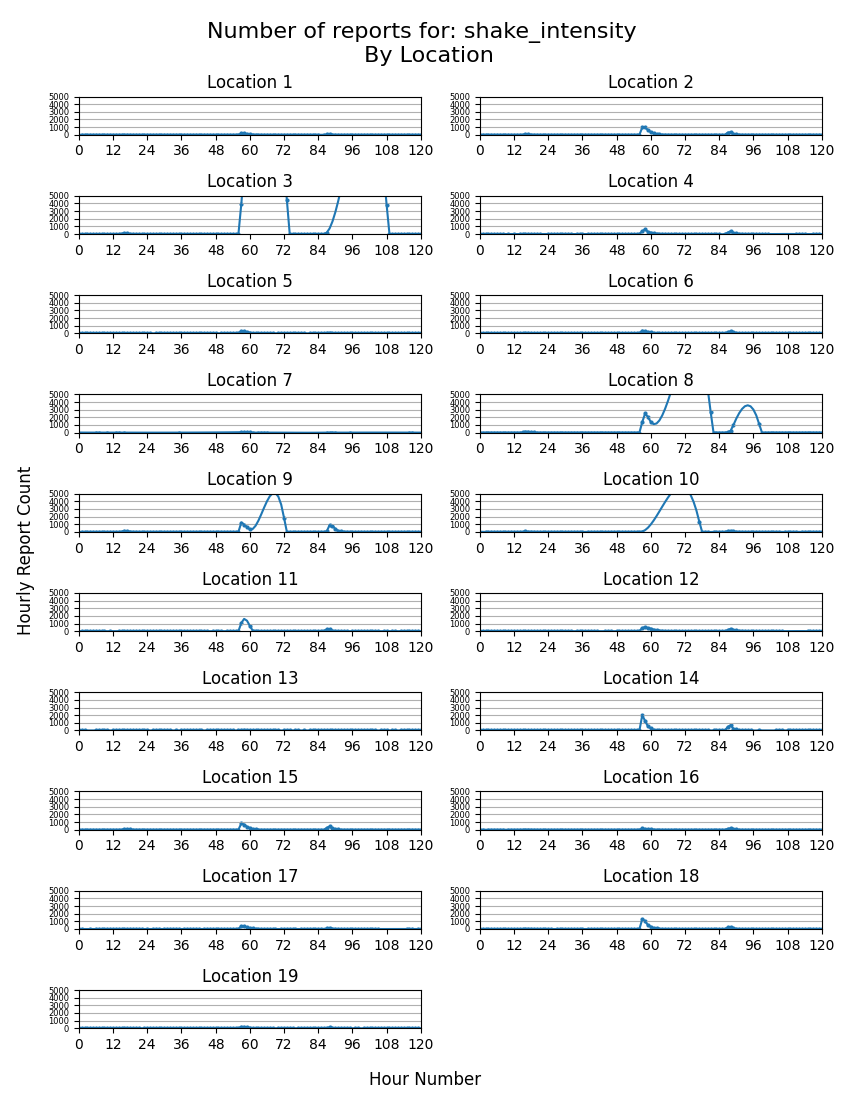

In [185]:
for i in damageReports:
    plot_grid_counts(jCountBins5, i)

In [186]:
# Setting up Urgency calculations

jmeanBins

hourNumber  sewer_and_water      power  \
time       location                                           
2020-04-06 2                0.0         4.333333   8.333333   
           3                0.0         3.833333   5.333333   
           4                0.0         8.000000   3.200000   
           5                0.0         4.500000   3.000000   
           6                0.0         4.428571   5.000000   
...                         ...              ...        ...   
2020-04-11 14             120.0         7.000000  10.000000   
           15             120.0         7.166667   4.500000   
           16             120.0         0.000000   6.500000   
           17             120.0         6.000000   5.666667   
           18             120.0         6.000000   8.000000   

                     roads_and_bridges   medical  buildings  shake_intensity  \
time       location                                                            
2020-04-06 2                  3.000000       NaN   5.000000              0.0   
           3                  8.166667  5.833333   4.166667              1.0   
           4                  8.600000       NaN   6.200000              0.5   
           5                  1.500000  8.000000   6.500000              NaN   
           6                  3.857143  5.857143   6.571429              1.0   
...                                ...       ...        ...              ...   
2020-04-11 14                 9.000000       NaN  10.000000              NaN   
           15                 5.166667       NaN   3.000000              1.0   
           16                 1.000000  5.500000   9.000000              NaN   
           17                 4.666667       NaN   6.000000              NaN   
           18                 3.500000       NaN   2.000000              0.5   

                     hasHospital  hasOutsideAccess  hasSewerWork  hasRoadWork  \
time       location                                                             
2020-04-06 2                 0.0               0.0           0.0          0.0   
           3                 1.0               1.0           1.0          1.0   
           4                 0.0               1.0           0.0          1.0   
           5                 1.0               0.0           0.0          0.0   
           6                 1.0               0.0           0.0          1.0   
...                          ...               ...           ...          ...   
2020-04-11 14                0.0               0.0           0.0          0.0   
           15                0.0               0.0           0.0          0.0   
           16                1.0               0.0           0.0          1.0   
           17                0.0               0.0           0.0          0.0   
           18                0.0               0.0           1.0          0.0   

                     hasPowerWork  maxMeasuredShake  xCoords  yCoords  \
time       location                                                     
2020-04-06 2                  0.0               3.0    300.0    200.0   
           3                  1.0               5.0    500.0    150.0   
           4                  0.0               5.0    650.0    300.0   
           5                  1.0               1.0    300.0    450.0   
           6                  0.0               2.0    300.0    300.0   
...                           ...               ...      ...      ...   
2020-04-11 14                 0.0               3.0    475.0    300.0   
           15                 0.0               2.0    390.0    300.0   
           16                 0.0               2.0    390.0    390.0   
           17                 0.0               2.0    575.0    525.0   
           18                 0.0               3.0    600.0    450.0   

                     locationCopy  
time       location                
2020-04-06 2                  2.0  
           3                  3.0  
           4

In [187]:
beforeDF = jmedianBins[jmedianBins['hourNumber'].between(0,48)].groupby('locationCopy').mean()
afterDF = jmedianBins[jmedianBins['hourNumber'].between(108,120)].groupby('locationCopy').mean()

In [188]:
shakeDiscrepancy = jmedianBins.groupby('locationCopy').max()
shakeDiscrepancy

hourNumber  sewer_and_water  power  roads_and_bridges  medical  \
locationCopy                                                                   
1.0                120.0             10.0   10.0               10.0     10.0   
2.0                120.0             10.0   10.0               10.0     10.0   
3.0                120.0             10.0   10.0               10.0      9.0   
4.0                119.0             10.0   10.0               10.0      9.0   
5.0                120.0             10.0   10.0               10.0     10.0   
6.0                120.0              9.0    9.0               10.0      9.0   
7.0                117.0             10.0   10.0               10.0      6.0   
8.0                120.0             10.0    9.0               10.0     10.0   
9.0                120.0             10.0    9.0               10.0      9.5   
10.0               120.0             10.0   10.0               10.0      6.5   
11.0               119.0             10.0   10.0               10.0     10.0   
12.0               120.0             10.0   10.0               10.0      9.0   
13.0               120.0             10.0   10.0               10.0      6.0   
14.0               120.0             10.0   10.0               10.0      7.0   
15.0               120.0             10.0    9.0                9.0     10.0   
16.0               120.0             10.0   10.0               10.0     10.0   
17.0               120.0             10.0   10.0               10.0     10.0   
18.0               120.0             10.0   10.0               10.0      8.0   
19.0               119.0             10.0   10.0               10.0      8.0   

              buildings  shake_intensity  hasHospital  hasOutsideAccess  \
locationCopy                                                              
1.0                10.0              1.0          1.0               1.0   
2.0                 9.0              2.0          0.0               0.0   
3.0                10.0              6.0          1.0               1.0   
4.0                10.0              6.0          0.0               1.0   
5.0                10.0              1.0          1.0               0.0   
6.0                10.0              2.0          1.0               0.0   
7.0                 8.0              5.0          0.0               1.0   
8.0                 9.0              2.0          0.0               1.0   
9.0                10.0              2.0          1.0               0.0   
10.0               10.0              2.0          0.0               0.0   
11.0               10.0              3.0          1.0               0.0   
12.0               10.0              6.5          0.0               1.0   
13.0               10.0              4.0          0.0               0.0   
14.0               10.0              4.0          0.0               0.0   
15.0               10.0              3.0          0.0               0.0   
16.0               10.0              2.0          1.0               0.0   
17.0               10.0              2.0          0.0               0.0   
18.0               10.0              4.0          0.0               0.0   
19.0               10.0              3.0          0.0               0.0   

              hasSewerWork  hasRoadWork  hasPowerWork  maxMeasuredShake  \
locationCopy                                                              
1.0                    0.0          1.0           0.0               1.0   
2.0                    0.0          0.0           0.0               3.0   
3.0                    1.0          1.0           1.0               5.0   
4.0                    0.0          1.0           0.0               5.0   
5.0                    0.0          0.0           1.0               1.0   
6.0                    0.0          1.0           0.0               2.0   
7.0                    0.0          1.0           0.0               5.0   
8.0                    0.0          1.0           0.0               2.0   
9.0    

In [189]:
locationLst = [i for i in range(1,20)]
reportedShake = shakeDiscrepancy['shake_intensity']
# Note this is a maximum of the median reported shakes
measuredShake = shakeDiscrepancy['maxMeasuredShake']
discrepDict = {'location': locationLst, 'maxReportedShake': reportedShake, 'maxMeasuredShake': measuredShake}
shakeDiscrepancy2 = pd.DataFrame(discrepDict)
shakeDiscrepancy2['discrepancy'] = shakeDiscrepancy2['maxReportedShake']-shakeDiscrepancy2['maxMeasuredShake']
shakeDiscrepancy2

location  maxReportedShake  maxMeasuredShake  discrepancy
locationCopy                                                           
1.0                  1               1.0               1.0          0.0
2.0                  2               2.0               3.0         -1.0
3.0                  3               6.0               5.0          1.0
4.0                  4               6.0               5.0          1.0
5.0                  5               1.0               1.0          0.0
6.0                  6               2.0               2.0          0.0
7.0                  7               5.0               5.0          0.0
8.0                  8               2.0               2.0          0.0
9.0                  9               2.0               2.0          0.0
10.0                10               2.0               2.0          0.0
11.0                11               3.0               3.0          0.0
12.0                12               6.5               4.0          2.5
13.0                13               4.0               4.0          0.0
14.0                14               4.0               3.0          1.0
15.0                15               3.0               2.0          1.0
16.0                16               2.0               2.0          0.0
17.0                17               2.0               2.0          0.0
18.0                18               4.0               3.0          1.0
19.0                19               3.0               2.0          1.0

In [190]:
listofthings = [int(i) for i in shakeDiscrepancy['shake_intensity']]
listofthings2 = [int(i) for i in shakeDiscrepancy['maxMeasuredShake']]
discrepancy = [listofthings[i]  - listofthings2[i] for i in range(len(listofthings))]

In [191]:
discrepancyTuples = []
count = 0
for i in discrepancy:
    count+=1
    a = str(count) + ": " + str(i)
    discrepancyTuples.append(a)
print(discrepancyTuples)

['1: 0', '2: -1', '3: 1', '4: 1', '5: 0', '6: 0', '7: 0', '8: 0', '9: 0', '10: 0', '11: 0', '12: 2', '13: 0', '14: 1', '15: 1', '16: 0', '17: 0', '18: 1', '19: 1']


In [192]:
beforeDF

hourNumber  sewer_and_water     power  roads_and_bridges  \
locationCopy                                                             
1.0            24.500000         5.052083  4.739583           4.750000   
2.0            24.000000         4.989796  5.061224           4.795918   
3.0            24.000000         4.846939  4.959184           5.275510   
4.0            24.476190         5.369048  5.035714           4.511905   
5.0            23.958333         4.427083  4.635417           4.562500   
6.0            24.000000         4.877551  4.724490           5.051020   
7.0            14.428571              NaN  4.000000           5.428571   
8.0            24.000000         4.795918  4.795918           5.255102   
9.0            24.500000         4.802083  5.208333           4.531250   
10.0           24.739130         4.000000  5.141304           5.706522   
11.0           24.886364         5.295455  5.488636           5.261364   
12.0           22.466667         4.522222  5.144444           4.388889   
13.0           24.780488         4.963415  4.463415           6.048780   
14.0           24.000000         5.275510  4.510204           4.714286   
15.0           24.000000         4.785714  4.438776           4.918367   
16.0           24.787234         4.882979  4.372340           5.021277   
17.0           24.634146         4.841463  5.012195           5.109756   
18.0           23.680851         4.787234  4.478723           4.755319   
19.0           24.041667         5.333333  4.739583           4.802083   

               medical  buildings  shake_intensity  hasHospital  \
locationCopy                                                      
1.0           5.958333   5.343750         0.482143          1.0   
2.0           5.666667   5.010204         0.550000          0.0   
3.0           5.551020   4.979592         0.635135          1.0   
4.0           4.000000   4.714286         0.916667          0.0   
5.0           4.822917   4.614583         0.392857          1.0   
6.0           4.775510   5.163265         0.473684          1.0   
7.0                NaN        NaN         1.000000          0.0   
8.0           4.700000   4.989796         0.400000          0.0   
9.0           4.885417   5.437500         0.305556          1.0   
10.0          6.500000   5.076087         0.575000          0.0   
11.0          4.306818   4.886364         0.361111          1.0   
12.0          7.000000   5.066667         0.566667          0.0   
13.0          1.500000   5.024390         0.263158          0.0   
14.0          5.750000   4.561224         0.365385          0.0   
15.0          5.500000   4.795918         0.465116          0.0   
16.0          4.202128   5.117021         0.447368          1.0   
17.0          2.000000   5.036585         0.633333          0.0   
18.0          4.250000   4.882979         0.300000          0.0   
19.0          3.333333   4.927083         0.428571          0.0   

              hasOutsideAccess  hasSewerWork  hasRoadWork  hasPowerWork  \
locationCopy                                                              
1.0                        1.0           0.0          1.0           0.0   
2.0                        0.0           0.0          0.0           0.0   
3.0                        1.0           1.0          1.0           1.0   
4.0                        1.0           0.0          1.0           0.0   
5.0                        0.0           0.0          0.0           1.0   
6.0                        0.0           0.0          1.0           0.0   
7.0                        1.0           0.0          1.0           0.0   
8.0                        1.0           0.0          1.0           0.0   
9.0                        0.0           0.0          1.0           0.0   
10.0                       0.0           0.0          1.0           0.0   
11.0                       0.0           0.0          0.0           0.0   
12.0                       1.0           0.0          0.0           0.0   
1

In [193]:
afterDF

hourNumber  sewer_and_water      power  roads_and_bridges  \
locationCopy                                                              
1.0           114.000000         5.269231   6.653846           5.153846   
2.0           114.000000         6.076923   4.961538           4.884615   
3.0           114.000000         6.000000   6.153846           6.269231   
4.0           114.857143         5.357143   3.857143           5.857143   
5.0           114.000000         5.000000   6.000000           4.769231   
6.0           114.000000         5.692308   5.384615           5.384615   
7.0           116.500000              NaN  10.000000           1.000000   
8.0           114.000000         5.923077   4.500000           5.461538   
9.0           114.000000         4.884615   5.153846           5.346154   
10.0          114.166667         6.000000   5.750000           5.583333   
11.0          114.100000         3.700000   5.250000           5.750000   
12.0          117.500000         4.583333   4.250000           4.583333   
13.0          114.636364         5.227273   7.090909           4.772727   
14.0          114.000000         5.961538   5.884615           5.346154   
15.0          114.000000         5.384615   4.461538           5.346154   
16.0          114.000000         5.576923   5.730769           4.923077   
17.0          117.400000         5.300000   5.100000           4.000000   
18.0          114.000000         5.230769   6.269231           5.961538   
19.0          113.500000         4.583333   5.666667           5.416667   

               medical  buildings  shake_intensity  hasHospital  \
locationCopy                                                      
1.0           6.307692   5.115385         0.800000          1.0   
2.0           2.500000   6.307692         0.666667          0.0   
3.0           5.538462   5.192308         0.708333          1.0   
4.0                NaN   5.000000         0.500000          0.0   
5.0           3.846154   6.076923         0.333333          1.0   
6.0           5.384615   6.115385         0.576923          1.0   
7.0                NaN        NaN         0.000000          0.0   
8.0           5.000000   5.269231         0.346154          0.0   
9.0           5.076923   4.615385         0.500000          1.0   
10.0               NaN   4.875000         0.625000          0.0   
11.0          5.250000   5.350000         0.875000          1.0   
12.0          6.000000   4.666667         0.500000          0.0   
13.0               NaN   6.090909         0.500000          0.0   
14.0          0.000000   5.846154         0.300000          0.0   
15.0          5.000000   5.115385         0.458333          0.0   
16.0          5.307692   6.384615         0.800000          1.0   
17.0               NaN   6.800000         0.500000          0.0   
18.0               NaN   5.115385         0.357143          0.0   
19.0               NaN   5.333333         0.785714          0.0   

              hasOutsideAccess  hasSewerWork  hasRoadWork  hasPowerWork  \
locationCopy                                                              
1.0                        1.0           0.0          1.0           0.0   
2.0                        0.0           0.0          0.0           0.0   
3.0                        1.0           1.0          1.0           1.0   
4.0                        1.0           0.0          1.0           0.0   
5.0                        0.0           0.0          0.0           1.0   
6.0                        0.0           0.0          1.0           0.0   
7.0                        1.0           0.0          1.0           0.0   
8.0                        1.0           0.0          1.0           0.0   
9.0                        0.0           0.0          1.0           0.0   
10.0                       0.0           0.0          1.0           0.0   
11.0                       0.0           0.0          0.0           0.0   
12.0                       1.0           0.0          0

In [194]:
damageReports
changeDF = pd.DataFrame()
for i in damageReports:
    changeDF[f'delta_{i}'] = afterDF[i]-beforeDF[i]

In [195]:
changeDF['xCoords'] = neighDF['xCoords']
changeDF['yCoords'] = neighDF['yCoords']

In [196]:
changeDF

delta_sewer_and_water  delta_power  delta_roads_and_bridges  \
locationCopy                                                                
1.0                        0.217147     1.914263                 0.403846   
2.0                        1.087127    -0.099686                 0.088697   
3.0                        1.153061     1.194662                 0.993721   
4.0                       -0.011905    -1.178571                 1.345238   
5.0                        0.572917     1.364583                 0.206731   
6.0                        0.814757     0.660126                 0.333595   
7.0                             NaN     6.000000                -4.428571   
8.0                        1.127159    -0.295918                 0.206436   
9.0                        0.082532    -0.054487                 0.814904   
10.0                       2.000000     0.608696                -0.123188   
11.0                      -1.595455    -0.238636                 0.488636   
12.0                       0.061111    -0.894444                 0.194444   
13.0                       0.263858     2.627494                -1.276053   
14.0                       0.686028     1.374411                 0.631868   
15.0                       0.598901     0.022763                 0.427786   
16.0                       0.693944     1.358429                -0.098200   
17.0                       0.458537     0.087805                -1.109756   
18.0                       0.443535     1.790507                 1.206219   
19.0                      -0.750000     0.927083                 0.614583   

              delta_medical  delta_buildings  delta_shake_intensity  xCoords  \
locationCopy                                                                   
1.0                0.349359        -0.228365               0.317857    300.0   
2.0               -3.166667         1.297488               0.116667    500.0   
3.0               -0.012559         0.212716               0.073198    650.0   
4.0                     NaN         0.285714              -0.416667    300.0   
5.0               -0.976763         1.462340              -0.059524    300.0   
6.0                0.609105         0.952119               0.103239    950.0   
7.0                     NaN              NaN              -1.000000    800.0   
8.0                0.300000         0.279435              -0.053846    600.0   
9.0                0.191506        -0.822115               0.194444    750.0   
10.0                    NaN        -0.201087               0.050000    850.0   
11.0               0.943182         0.463636               0.513889    850.0   
12.0              -1.000000        -0.400000              -0.066667    700.0   
13.0                    NaN         1.066519               0.236842    475.0   
14.0              -5.750000         1.284929              -0.065385    390.0   
15.0              -0.500000         0.319466              -0.006783    390.0   
16.0               1.105565         1.267594               0.352632    575.0   
17.0                    NaN         1.763415              -0.133333    600.0   
18.0                    NaN         0.232406               0.057143    475.0   
19.0                    NaN         0.406250               0.357143      NaN   

              yCoords  
locationCopy           
1.0             200.0  
2.0             150.0  
3.0             300.0  
4.0             450.0  
5.0             300.0  
6.0             500.0  
7.0             700.0  
8.0             700.0  
9.0             650.0  
10.0            600.0  
11.0            450.0  
12.0            450.0  
13.0            300.0  
14.0            300.0  
15.0            390.0  
16.0            525.0  
17.0            450.0  
18.0            450.0  
19.0              NaN

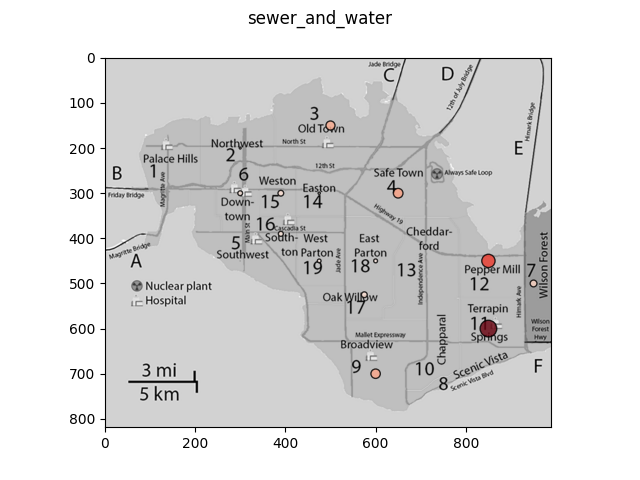

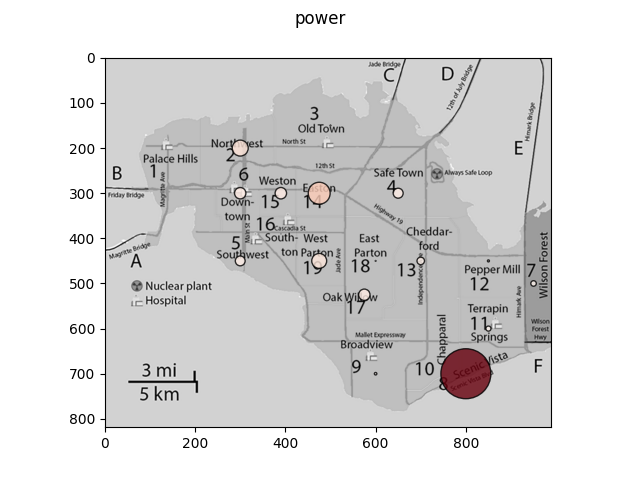

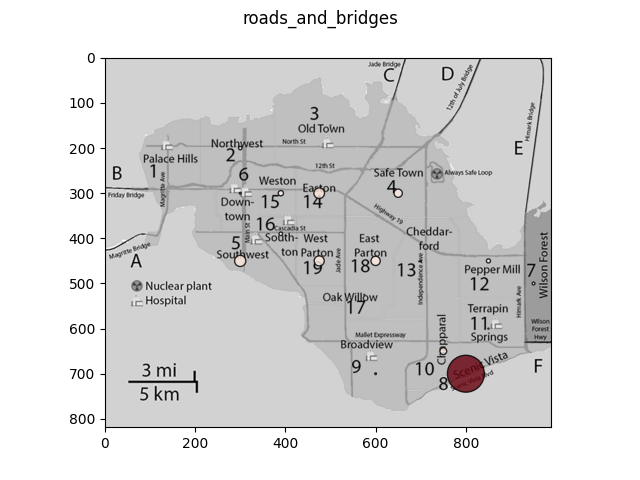

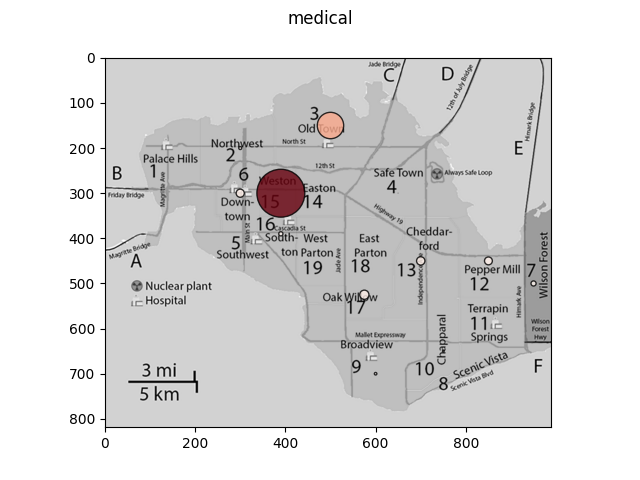

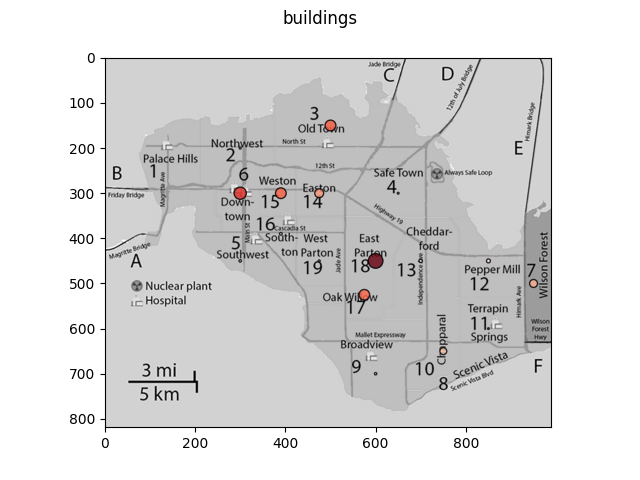

In [197]:
# plots just the change in mean damage reports from before to after
for i in damageReports[:-1]:
    plt.clf()
    fig, ax = plt.subplots()
    neighborhood = plt.imread("neighborhoodGray.png")
    x = changeDF["xCoords"]
    y = changeDF["yCoords"]
    frameCol = changeDF[f'delta_{i}']
    size = [(6*i)**2 for i in frameCol]
    ax.scatter(x, y, marker='o', s = size, alpha = 0.8, cmap = "Reds", c = size, edgecolors= "black")
    ax.imshow(neighborhood)
    fig.suptitle(i)
    plt.show()

In [198]:
neighDF

location              Name  hasHospital  hasOutsideAccess  hasSewerWork  \
0          1      Palace Hills            1                 1             0   
1          2         Northwest            0                 0             0   
2          3          Old Town            1                 1             1   
3          4         Safe Town            0                 1             0   
4          5         Southwest            1                 0             0   
5          6          Downtown            1                 0             0   
6          7     Wilson Forest            0                 1             0   
7          8      Scenic Vista            0                 1             0   
8          9         Broadview            1                 0             0   
9         10         Chapparal            0                 0             0   
10        11  Terrapin Springs            1                 0             0   
11        12       Pepper Mill            0                 1             0   
12        13       Cheddarford            0                 0             0   
13        14            Easton            0                 0             0   
14        15            Weston            0                 0             0   
15        16          Southton            1                 0             0   
16        17        Oak Willow            0                 0             0   
17        18       East Parton            0                 0             1   
18        19       West Parton            0                 0             1   

    hasRoadWork  hasPowerWork  maxMeasuredShake  xCoords  yCoords  
0             1             0               1.0      150      200  
1             0             0               3.0      300      200  
2             1             1               5.0      500      150  
3             1             0               5.0      650      300  
4             0             1               1.0      300      450  
5             1             0               2.0      300      300  
6             1             0               5.0      950      500  
7             1             0               2.0      800      700  
8             1             0               2.0      600      700  
9             1             0               2.0      750      650  
10            0             0               3.0      850      600  
11            0             0               4.0      850      450  
12            1             0               4.0      700      450  
13            0             0               3.0      475      300  
14            0             0               2.0      390      300  
15            1             0               2.0      390      390  
16            0             0               2.0      575      525  
17            0             0               3.0      600      450  
18            0             0               2.0      475      450

In [199]:
changeDF

delta_sewer_and_water  delta_power  delta_roads_and_bridges  \
locationCopy                                                                
1.0                        0.217147     1.914263                 0.403846   
2.0                        1.087127    -0.099686                 0.088697   
3.0                        1.153061     1.194662                 0.993721   
4.0                       -0.011905    -1.178571                 1.345238   
5.0                        0.572917     1.364583                 0.206731   
6.0                        0.814757     0.660126                 0.333595   
7.0                             NaN     6.000000                -4.428571   
8.0                        1.127159    -0.295918                 0.206436   
9.0                        0.082532    -0.054487                 0.814904   
10.0                       2.000000     0.608696                -0.123188   
11.0                      -1.595455    -0.238636                 0.488636   
12.0                       0.061111    -0.894444                 0.194444   
13.0                       0.263858     2.627494                -1.276053   
14.0                       0.686028     1.374411                 0.631868   
15.0                       0.598901     0.022763                 0.427786   
16.0                       0.693944     1.358429                -0.098200   
17.0                       0.458537     0.087805                -1.109756   
18.0                       0.443535     1.790507                 1.206219   
19.0                      -0.750000     0.927083                 0.614583   

              delta_medical  delta_buildings  delta_shake_intensity  xCoords  \
locationCopy                                                                   
1.0                0.349359        -0.228365               0.317857    300.0   
2.0               -3.166667         1.297488               0.116667    500.0   
3.0               -0.012559         0.212716               0.073198    650.0   
4.0                     NaN         0.285714              -0.416667    300.0   
5.0               -0.976763         1.462340              -0.059524    300.0   
6.0                0.609105         0.952119               0.103239    950.0   
7.0                     NaN              NaN              -1.000000    800.0   
8.0                0.300000         0.279435              -0.053846    600.0   
9.0                0.191506        -0.822115               0.194444    750.0   
10.0                    NaN        -0.201087               0.050000    850.0   
11.0               0.943182         0.463636               0.513889    850.0   
12.0              -1.000000        -0.400000              -0.066667    700.0   
13.0                    NaN         1.066519               0.236842    475.0   
14.0              -5.750000         1.284929              -0.065385    390.0   
15.0              -0.500000         0.319466              -0.006783    390.0   
16.0               1.105565         1.267594               0.352632    575.0   
17.0                    NaN         1.763415              -0.133333    600.0   
18.0                    NaN         0.232406               0.057143    475.0   
19.0                    NaN         0.406250               0.357143      NaN   

              yCoords  
locationCopy           
1.0             200.0  
2.0             150.0  
3.0             300.0  
4.0             450.0  
5.0             300.0  
6.0             500.0  
7.0             700.0  
8.0             700.0  
9.0             650.0  
10.0            600.0  
11.0            450.0  
12.0            450.0  
13.0            300.0  
14.0            300.0  
15.0            390.0  
16.0            525.0  
17.0            450.0  
18.0            450.0  
19.0              NaN

In [200]:
afterDF

hourNumber  sewer_and_water      power  roads_and_bridges  \
locationCopy                                                              
1.0           114.000000         5.269231   6.653846           5.153846   
2.0           114.000000         6.076923   4.961538           4.884615   
3.0           114.000000         6.000000   6.153846           6.269231   
4.0           114.857143         5.357143   3.857143           5.857143   
5.0           114.000000         5.000000   6.000000           4.769231   
6.0           114.000000         5.692308   5.384615           5.384615   
7.0           116.500000              NaN  10.000000           1.000000   
8.0           114.000000         5.923077   4.500000           5.461538   
9.0           114.000000         4.884615   5.153846           5.346154   
10.0          114.166667         6.000000   5.750000           5.583333   
11.0          114.100000         3.700000   5.250000           5.750000   
12.0          117.500000         4.583333   4.250000           4.583333   
13.0          114.636364         5.227273   7.090909           4.772727   
14.0          114.000000         5.961538   5.884615           5.346154   
15.0          114.000000         5.384615   4.461538           5.346154   
16.0          114.000000         5.576923   5.730769           4.923077   
17.0          117.400000         5.300000   5.100000           4.000000   
18.0          114.000000         5.230769   6.269231           5.961538   
19.0          113.500000         4.583333   5.666667           5.416667   

               medical  buildings  shake_intensity  hasHospital  \
locationCopy                                                      
1.0           6.307692   5.115385         0.800000          1.0   
2.0           2.500000   6.307692         0.666667          0.0   
3.0           5.538462   5.192308         0.708333          1.0   
4.0                NaN   5.000000         0.500000          0.0   
5.0           3.846154   6.076923         0.333333          1.0   
6.0           5.384615   6.115385         0.576923          1.0   
7.0                NaN        NaN         0.000000          0.0   
8.0           5.000000   5.269231         0.346154          0.0   
9.0           5.076923   4.615385         0.500000          1.0   
10.0               NaN   4.875000         0.625000          0.0   
11.0          5.250000   5.350000         0.875000          1.0   
12.0          6.000000   4.666667         0.500000          0.0   
13.0               NaN   6.090909         0.500000          0.0   
14.0          0.000000   5.846154         0.300000          0.0   
15.0          5.000000   5.115385         0.458333          0.0   
16.0          5.307692   6.384615         0.800000          1.0   
17.0               NaN   6.800000         0.500000          0.0   
18.0               NaN   5.115385         0.357143          0.0   
19.0               NaN   5.333333         0.785714          0.0   

              hasOutsideAccess  hasSewerWork  hasRoadWork  hasPowerWork  \
locationCopy                                                              
1.0                        1.0           0.0          1.0           0.0   
2.0                        0.0           0.0          0.0           0.0   
3.0                        1.0           1.0          1.0           1.0   
4.0                        1.0           0.0          1.0           0.0   
5.0                        0.0           0.0          0.0           1.0   
6.0                        0.0           0.0          1.0           0.0   
7.0                        1.0           0.0          1.0           0.0   
8.0                        1.0           0.0          1.0           0.0   
9.0                        0.0           0.0          1.0           0.0   
10.0                       0.0           0.0          1.0           0.0   
11.0                       0.0           0.0          0.0           0.0   
12.0                       1.0           0.0          0

In [201]:
urgencyDF = afterDF.merge(changeDF, on = 'locationCopy')
urgencyDF2 = urgencyDF.merge(shakeDiscrepancy2, left_on = 'locationCopy', right_on = 'location')
urgencyDF2['truthModifier'] = 1-(urgencyDF2['discrepancy']/10)
urgencyDF3 = urgencyDF2.fillna(0)
urgencyDF3['isNotLocation7'] = urgencyDF3['location'] != 7
urgencyDF3['isNotLocation7'] = urgencyDF3['isNotLocation7'].astype(int)

In [202]:
'''
Urgency evaluation for each damage type
Takes the mean of median reported damage values in the last 12 hours as the damage report and multiplies it by (1 + change in that value from before the big quake to after.
To that, it adds the max measured shake
It then multiplies the result of all of the above by location modifiers, primarily truthModifier and isNotLocation7
medical is multiplied by has hospital
2*hasOutsideAccess is added to roads_and_bridges urgency
'''

# Sewer Urgency
urgencyDF3['sewerUrgency'] = (urgencyDF3['sewer_and_water']*(urgencyDF3['delta_sewer_and_water']+1)+urgencyDF3['maxMeasuredShake_x'])*urgencyDF3['truthModifier']*urgencyDF3['isNotLocation7']

# Power Urgency
urgencyDF3['powerUrgency'] = (urgencyDF3['power']*(urgencyDF3['delta_power']+1)+urgencyDF3['maxMeasuredShake_x'])*urgencyDF3['truthModifier']*urgencyDF3['isNotLocation7']

# Road Urgency
urgencyDF3['roadUrgency'] = (urgencyDF3['roads_and_bridges']*(urgencyDF3['delta_roads_and_bridges']+1)+urgencyDF3['maxMeasuredShake_x']+2*urgencyDF3['hasOutsideAccess'])*urgencyDF3['truthModifier']*urgencyDF3['isNotLocation7']

# Medical Urgency
urgencyDF3['medicalUrgency'] = (urgencyDF3['medical']*(urgencyDF3['delta_medical']+1)+urgencyDF3['maxMeasuredShake_x'])*urgencyDF3['truthModifier']*urgencyDF3['isNotLocation7']*urgencyDF3['hasHospital']

# Buildings Urgency
urgencyDF3['buildingsUrgency'] = (urgencyDF3['buildings']*(urgencyDF3['delta_buildings']+1)+urgencyDF3['maxMeasuredShake_x'])*urgencyDF3['truthModifier']*urgencyDF3['isNotLocation7']

In [203]:
urgencyDF3

hourNumber  sewer_and_water      power  roads_and_bridges   medical  \
0   114.000000         5.269231   6.653846           5.153846  6.307692   
1   114.000000         6.076923   4.961538           4.884615  2.500000   
2   114.000000         6.000000   6.153846           6.269231  5.538462   
3   114.857143         5.357143   3.857143           5.857143  0.000000   
4   114.000000         5.000000   6.000000           4.769231  3.846154   
5   114.000000         5.692308   5.384615           5.384615  5.384615   
6   116.500000         0.000000  10.000000           1.000000  0.000000   
7   114.000000         5.923077   4.500000           5.461538  5.000000   
8   114.000000         4.884615   5.153846           5.346154  5.076923   
9   114.166667         6.000000   5.750000           5.583333  0.000000   
10  114.100000         3.700000   5.250000           5.750000  5.250000   
11  117.500000         4.583333   4.250000           4.583333  6.000000   
12  114.636364         5.227273   7.090909           4.772727  0.000000   
13  114.000000         5.961538   5.884615           5.346154  0.000000   
14  114.000000         5.384615   4.461538           5.346154  5.000000   
15  114.000000         5.576923   5.730769           4.923077  5.307692   
16  117.400000         5.300000   5.100000           4.000000  0.000000   
17  114.000000         5.230769   6.269231           5.961538  0.000000   
18  113.500000         4.583333   5.666667           5.416667  0.000000   

    buildings  shake_intensity  hasHospital  hasOutsideAccess  hasSewerWork  \
0    5.115385         0.800000          1.0               1.0           0.0   
1    6.307692         0.666667          0.0               0.0           0.0   
2    5.192308         0.708333          1.0               1.0           1.0   
3    5.000000         0.500000          0.0               1.0           0.0   
4    6.076923         0.333333          1.0               0.0           0.0   
5    6.115385         0.576923          1.0               0.0           0.0   
6    0.000000         0.000000          0.0               1.0           0.0   
7    5.269231         0.346154          0.0               1.0           0.0   
8    4.615385         0.500000          1.0               0.0           0.0   
9    4.875000         0.625000          0.0               0.0           0.0   
10   5.350000         0.875000          1.0               0.0           0.0   
11   4.666667         0.500000          0.0               1.0           0.0   
12   6.090909         0.500000          0.0               0.0           0.0   
13   5.846154         0.300000          0.0               0.0           0.0   
14   5.115385         0.458333          0.0               0.0           0.0   
15   6.384615         0.800000          1.0               0.0           0.0   
16   6.800000         0.500000          0.0               0.0           0.0   
17   5.115385         0.357143          0.0               0.0           1.0   
18   5.333333         0.785714          0.0               0.0           1.0   

    ...  maxReportedShake  maxMeasuredShake_y  discrepancy  truthModifier  \
0   ...               1.0                 1.0          0.0           1.00   
1   ...               2.0                 3.0         -1.0           1.10   
2   ...               6.0                 5.0          1.0           0.90   
3   ...               6.0                 5.0          1.0           0.90   
4   ...               1.0                 1.0          0.0           1.00   
5   ...               2.0                 2.0          0.0           1.00   
6   ...               5.0                 5.0          0.0           1.00   
7   ...               2.0                 2.0          0.0           1.00   
8   ...               2.0                 2.0          0.0           1.00   
9   ...               2.0                 2.0          0.0           1.00   
10  ...               3.0                 3.0          0.0           1.00  

In [204]:
# Reformatting urgency data
columns_of_interest = ['sewerUrgency', 'powerUrgency', 'roadUrgency', 'medicalUrgency', 'buildingsUrgency']
urgencyTuples = []
for col in columns_of_interest:
    for i in range(0,19):
        b = i+1
        a = urgencyDF3[col][i]
        c = col
        urgencyTup = (a, b, c)
        urgencyTuples.append(urgencyTup)
print(urgencyTuples)

[(7.413430719921106, 1, 'sewerUrgency'), (17.251642313730226, 2, 'sewerUrgency'), (16.126530612244895, 3, 'sewerUrgency'), (9.264030612244898, 4, 'sewerUrgency'), (8.864583333333336, 5, 'sewerUrgency'), (12.330153363120395, 6, 'sewerUrgency'), (0.0, 7, 'sewerUrgency'), (14.599323753169909, 8, 'sewerUrgency'), (7.287752712031562, 9, 'sewerUrgency'), (20.0, 10, 'sewerUrgency'), (0.796818181818181, 11, 'sewerUrgency'), (6.647569444444443, 12, 'sewerUrgency'), (10.60653094134247, 13, 'sewerUrgency'), (11.7461900736626, 14, 'sewerUrgency'), (9.548520710059174, 15, 'sewerUrgency'), (11.446997356162658, 16, 'sewerUrgency'), (9.730243902439021, 17, 'sewerUrgency'), (9.495719501447814, 18, 'sewerUrgency'), (2.83125, 19, 'sewerUrgency'), (20.39105645956608, 1, 'powerUrgency'), (8.213636638087188, 2, 'powerUrgency'), (16.655053737471324, 3, 'powerUrgency'), (3.8801020408163267, 4, 'powerUrgency'), (15.187499999999998, 5, 'powerUrgency'), (10.939137785291637, 6, 'powerUrgency'), (0.0, 7, 'powerUrg

In [205]:
urgencySorted = sorted(urgencyTuples, reverse = True)

In [206]:
urgencySorted2 = []
for i in urgencySorted:
    a = i[0]
    b = i[1]
    c = i[2]
    d = c[:-7]
    if d == 'road':
        d = 'roads_and_bridges'
    if d == 'sewer':
        d = 'sewer_and_water'
    myTup = (a, b, d)
    urgencySorted2.append(myTup)

In [207]:
urgencySorted2

[(29.72223342068131, 13, 'power'),
 (20.791219512195124, 17, 'buildings'),
 (20.39105645956608, 1, 'power'),
 (20.0, 10, 'sewer_and_water'),
 (19.24103369158314, 2, 'buildings'),
 (18.662755102040812, 4, 'roads_and_bridges'),
 (18.44490117084225, 18, 'power'),
 (17.549184881053012, 3, 'roads_and_bridges'),
 (17.251642313730226, 2, 'sewer_and_water'),
 (16.655053737471324, 3, 'power'),
 (16.58697843176779, 13, 'buildings'),
 (16.477716228125395, 16, 'buildings'),
 (16.126530612244895, 3, 'sewer_and_water'),
 (15.963449211045365, 5, 'buildings'),
 (15.51561123001385, 16, 'power'),
 (15.275247554643158, 14, 'power'),
 (15.187499999999998, 5, 'power'),
 (14.722243690375555, 14, 'buildings'),
 (14.599323753169909, 8, 'sewer_and_water'),
 (14.537215158000759, 18, 'roads_and_bridges'),
 (13.93796039125709, 6, 'buildings'),
 (13.201704545454547, 11, 'medical'),
 (13.175689286163918, 16, 'medical'),
 (12.330153363120395, 6, 'sewer_and_water'),
 (11.7461900736626, 14, 'sewer_and_water'),
 (11.70

In [208]:
urgencyRank = [i+1 for i in range(len(urgencySorted2))]
urgencyValue = [i[0] for i in urgencySorted2]
location = [i[1] for i in urgencySorted2]
damageType = [i[2] for i in urgencySorted2]
rankedUrgencyDict = {'urgencyRank': urgencyRank, 'urgencyValue': urgencyValue, 'location': location, 'damageType': damageType}

In [209]:
rankedUrgencyDF = pd.DataFrame(rankedUrgencyDict)
rankedUrgencyDF

urgencyRank  urgencyValue  location       damageType
0             1     29.722233        13            power
1             2     20.791220        17        buildings
2             3     20.391056         1            power
3             4     20.000000        10  sewer_and_water
4             5     19.241034         2        buildings
..          ...           ...       ...              ...
90           91      0.000000         7            power
91           92      0.000000         7          medical
92           93      0.000000         7        buildings
93           94      0.000000         4          medical
94           95     -0.000000         2          medical

[95 rows x 4 columns]

In [210]:
getCoordsDF = neighDF[['location', 'xCoords', 'yCoords']]

In [211]:
rankedUrgencyDF = rankedUrgencyDF.merge(getCoordsDF, how = 'left', on = 'location')

In [212]:
# Getting the 33 most urgent damage reports/locations
topUrgencyDF = rankedUrgencyDF[rankedUrgencyDF['urgencyRank']<=33]
urgencyCount = topUrgencyDF.groupby('location').count()
urgencyType = topUrgencyDF.groupby('damageType').count()
topUrgencyDF

urgencyRank  urgencyValue  location         damageType  xCoords  yCoords
0             1     29.722233        13              power      700      450
1             2     20.791220        17          buildings      575      525
2             3     20.391056         1              power      150      200
3             4     20.000000        10    sewer_and_water      750      650
4             5     19.241034         2          buildings      300      200
5             6     18.662755         4  roads_and_bridges      650      300
6             7     18.444901        18              power      600      450
7             8     17.549185         3  roads_and_bridges      500      150
8             9     17.251642         2    sewer_and_water      300      200
9            10     16.655054         3              power      500      150
10           11     16.586978        13          buildings      700      450
11           12     16.477716        16          buildings      390      390
12           13     16.126531         3    sewer_and_water      500      150
13           14     15.963449         5          buildings      300      450
14           15     15.515611        16              power      390      390
15           16     15.275248        14              power      475      300
16           17     15.187500         5              power      300      450
17           18     14.722244        14          buildings      475      300
18           19     14.599324         8    sewer_and_water      800      700
19           20     14.537215        18  roads_and_bridges      600      450
20           21     13.937960         6          buildings      300      300
21           22     13.201705        11            medical      850      600
22           23     13.175689        16            medical      390      390
23           24     12.330153         6    sewer_and_water      300      300
24           25     11.746190        14    sewer_and_water      475      300
25           26     11.702755         9  roads_and_bridges      600      700
26           27     11.628125        19              power      475      450
27           28     11.559659        11  roads_and_bridges      850      600
28           29     11.446997        16    sewer_and_water      390      390
29           30     11.250000        10              power      750      650
30           31     10.939138         6              power      300      300
31           32     10.830455        11          buildings      850      600
32           33     10.664413         6            medical      300      300

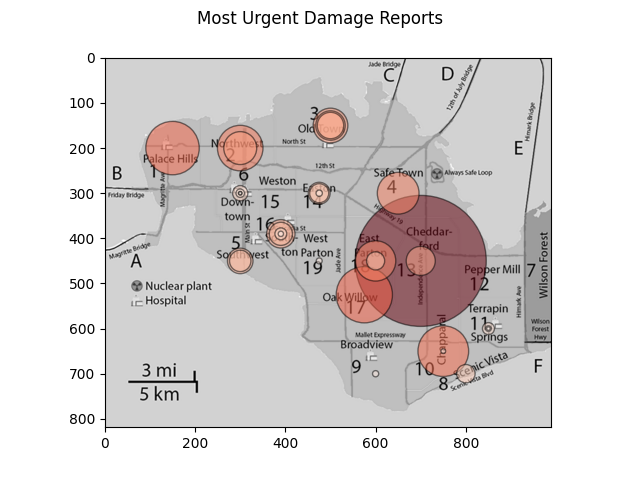

In [220]:
# Plotting the most urgent damage locations
plt.close()
plt.clf()
fig, ax = plt.subplots()
neighborhood = plt.imread("neighborhoodGray.png")
x = topUrgencyDF["xCoords"]
y = topUrgencyDF["yCoords"]
frameCol = topUrgencyDF['urgencyValue']
size = [(i-9)**3 for i in frameCol]
coloring = [(i-8) for i in frameCol]
ax.scatter(x, y, marker='o', s = size, alpha = 0.5, cmap = "Reds", c = coloring, edgecolors= "black")
ax.imshow(neighborhood)
fig.suptitle('Most Urgent Damage Reports')
plt.show()

In [214]:
# Counting how many of the top 33 are in each location
urgencyCount

urgencyRank  urgencyValue  damageType  xCoords  yCoords
location                                                         
1                   1             1           1        1        1
2                   2             2           2        2        2
3                   3             3           3        3        3
4                   1             1           1        1        1
5                   2             2           2        2        2
6                   4             4           4        4        4
8                   1             1           1        1        1
9                   1             1           1        1        1
10                  2             2           2        2        2
11                  3             3           3        3        3
13                  2             2           2        2        2
14                  3             3           3        3        3
16                  4             4           4        4        4
17                  1             1           1        1        1
18                  2             2           2        2        2
19                  1             1           1        1        1

In [215]:
# Counting how many of each type of damage are in the top 33
urgencyType

urgencyRank  urgencyValue  location  xCoords  yCoords
damageType                                                              
buildings                    8             8         8        8        8
medical                      3             3         3        3        3
power                       10            10        10       10       10
roads_and_bridges            5             5         5        5        5
sewer_and_water              7             7         7        7        7